# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline
# 한글 폰트 사용을 위해서 세팅
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] =False

import warnings

# Matplotlib에서 발생하는 경고만 무시
warnings.filterwarnings('ignore', module='matplotlib')


# 데이터 전처리

In [2]:
df = pd.read_excel('/Users/seheemoon/Desktop/아주대학교/2023-2/빅데이터분석/데분_문세희/최종.xlsx')
df = df.drop('Unnamed: 0', axis=1)
df

,이름,연차,연도,팀명,몸값(만원),타율,경기수,타수,득점,2루타,...,국대 여부,좌타우타,올스타 출전 여부,기사수(제목+본문),기사수(제목),팀순위,결혼 여부,연고지 일치 여부,키,몸무게
0,강경학,3,2015,한화,6500,0.257,120,311,50,7,...,0,0,0,768,20,6,0,X,180,72
1,강경학,4,2016,한화,6200,0.158,46,101,16,3,...,0,0,0,768,20,6,0,X,180,72
2,강구성,2,2015,NC,2700,0.200,4,5,0,1,...,0,0,0,11,0,3,0,X,180,82
3,강구성,3,2016,NC,2700,0.000,2,3,0,0,...,0,0,0,11,0,3,0,X,180,82
4,강민국,2,2015,NC,2700,0.000,1,2,0,0,...,1,1,0,25,0,3,0,X,176,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,황윤호,2,2016,NC,3000,0.083,33,12,7,0,...,0,1,0,22,1,3,0,X,177,78
364,황재균,9,2015,롯데,50000,0.290,144,534,95,41,...,1,1,1,2160,163,8,0,X,183,96
365,황재균,10,2016,롯데,120000,0.335,127,498,97,26,...,1,1,1,2160,163,8,0,X,183,96
366,황진수,4,2015,롯데,2800,0.000,2,2,0,0,...,0,0,0,1,0,8,0,X,181,82


In [3]:
# 연고지 일치 여부 O, X로 되어 있는 것 1, 0으로 대체
# 기사수(제목+본문) 열 삭제
# 팀 순위 -> 1등 : 10, 2등 : 9점, ... , 10등 : 1점으로 대체
df['연고지 일치 여부'] = df['연고지 일치 여부'].replace('X', 0)
df['연고지 일치 여부'] = df['연고지 일치 여부'].replace('O', 1)
df['연고지 일치 여부'] = df['연고지 일치 여부'].replace('o', 1)
df['연고지 일치 여부'] = df['연고지 일치 여부'].replace('x', 0)
df['팀순위가중치'] = 10 - df['팀순위']
df.drop('기사수(제목+본문)', axis=1, inplace=True)
df.drop('팀순위', axis=1, inplace=True)
df

,이름,연차,연도,팀명,몸값(만원),타율,경기수,타수,득점,2루타,...,fa 여부,국대 여부,좌타우타,올스타 출전 여부,기사수(제목),결혼 여부,연고지 일치 여부,키,몸무게,팀순위가중치
0,강경학,3,2015,한화,6500,0.257,120,311,50,7,...,0,0,0,0,20,0,0,180,72,4
1,강경학,4,2016,한화,6200,0.158,46,101,16,3,...,0,0,0,0,20,0,0,180,72,4
2,강구성,2,2015,NC,2700,0.200,4,5,0,1,...,0,0,0,0,0,0,0,180,82,7
3,강구성,3,2016,NC,2700,0.000,2,3,0,0,...,0,0,0,0,0,0,0,180,82,7
4,강민국,2,2015,NC,2700,0.000,1,2,0,0,...,0,1,1,0,0,0,0,176,80,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,황윤호,2,2016,NC,3000,0.083,33,12,7,0,...,0,0,1,0,1,0,0,177,78,7
364,황재균,9,2015,롯데,50000,0.290,144,534,95,41,...,1,1,1,1,163,0,0,183,96,2
365,황재균,10,2016,롯데,120000,0.335,127,498,97,26,...,1,1,1,1,163,0,0,183,96,2
366,황진수,4,2015,롯데,2800,0.000,2,2,0,0,...,0,0,0,0,0,0,0,181,82,2


In [4]:
# 경기적 요소와 비경기적 요소 리스트
saber_lst = ['타율', '경기수', '타수', '득점', '2루타', '3루타', '홈런', '루타', '타점', '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '실책', 'OPS', '단타'] # 총 18개
nonsaber_lst = ['연차', 'fa 여부', '국대 여부', '좌타우타', '올스타 출전 여부', '기사수(제목)', '팀순위가중치', '결혼 여부', '연고지 일치 여부', '키', '몸무게'] # 총 11개

# 수치형 변수와 범주형 변수
numerical_features = ['연차', '타율', '경기수', '타수', '득점', '2루타', '3루타', '홈런', '루타', '타점',
       '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '실책', 'OPS', '단타', '기사수(제목)', '팀순위가중치', '키', '몸무게'] # 총 23개
categorical_features = ['fa 여부', '국대 여부', '좌타우타', '올스타 출전 여부', '결혼 여부', '연고지 일치 여부'] # 총 6개

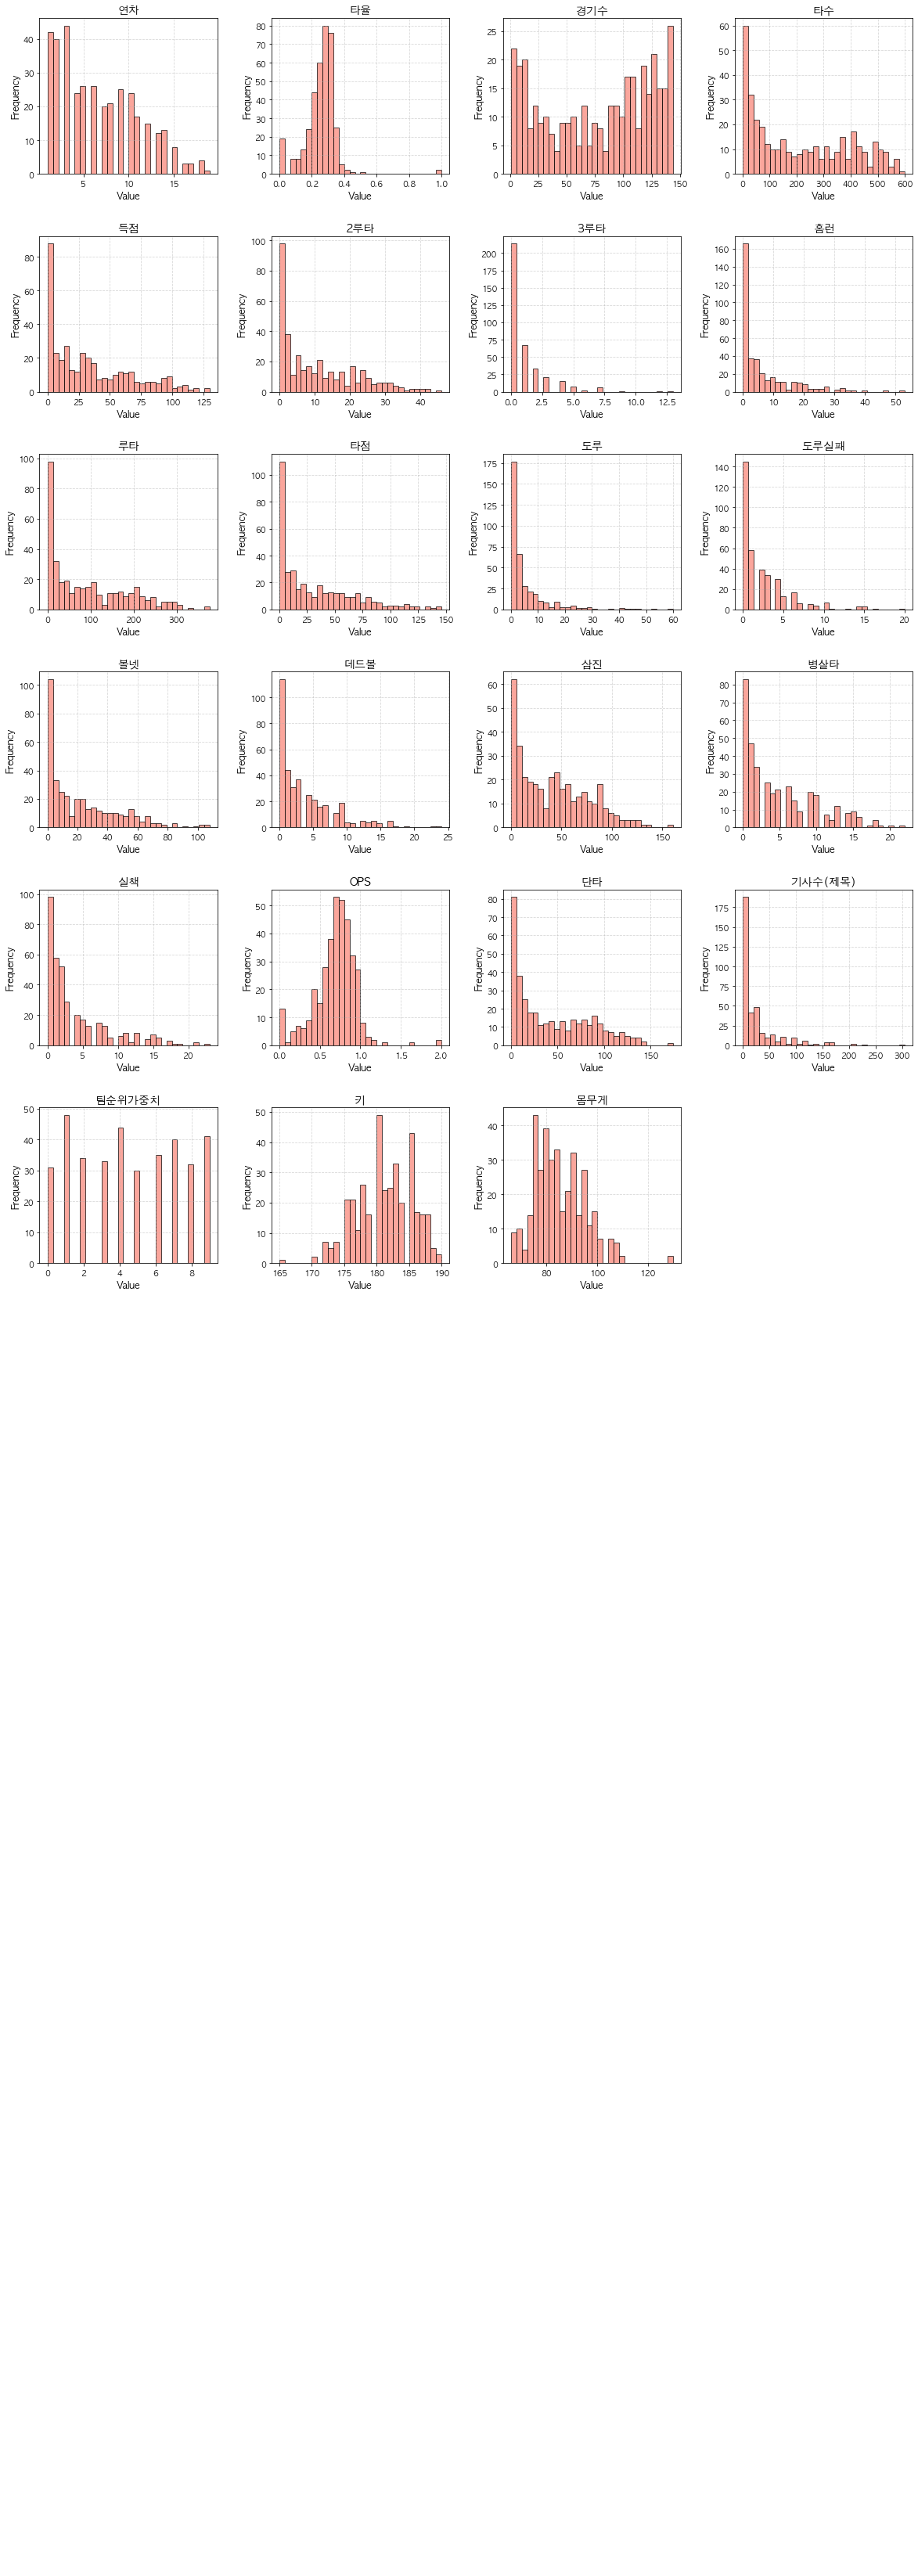

In [5]:
# saber_lst의 길이에 따라 행과 열의 수를 결정
rows = int(np.ceil(len(numerical_features) / 2))
cols = 4

# 서브플롯 설정
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

# 각 서브플롯에 대한 히스토그램 그리기
for i, col in enumerate(numerical_features):
    ax = axes[i // cols, i % cols]
    data = df[col]
    ax.hist(data, bins=30, edgecolor='black', alpha=0.7, color='salmon')  # alpha 값을 조정하여 투명도 적용
    ax.set_title(col, fontsize=14)  # 타이틀 폰트 크기 조정
    ax.set_xlabel('Value', fontsize=12)  # x축 라벨 폰트 크기 조정
    ax.set_ylabel('Frequency', fontsize=12)  # y축 라벨 폰트 크기 조정
    ax.grid(True, linestyle='--', alpha=0.5)  # 그리드 추가

# 빈 서브플롯 숨기기
for i in range(len(numerical_features), rows * cols):
    axes[i // cols, i % cols].axis('off')

# 서브플롯 간의 간격 조정
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 전체 그래프 보여주기
plt.show()

# 상관분석

- 변수들 간의 상관계수와 p-value 행렬을 출력하기 위한 준비단계

In [6]:
feature_list = list(df.columns)
features = df.iloc[:]
feature_list.remove('팀명')
feature_list.remove('이름')
feature_list.remove('연도')
features.drop('팀명', axis=1, inplace=True)
features.drop('이름', axis=1, inplace=True)
features.drop('연도', axis=1, inplace=True)

- 변수들 간의 상관계수와 p-value 행렬을 출력하기 위한 함수 정의

In [7]:
import scipy.stats as stats
def corr_c(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for idx in range(idx_length):
        for col in range(col_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[feature_list[idx]], features[feature_list[col]])[0]
    return dataframe

def corr_p(dataframe):
    col_length=len(dataframe.columns)
    idx_length=len(dataframe.index)
    for col in range(col_length):
        for idx in range(idx_length):
            dataframe.iloc[idx,col] = stats.pearsonr(features[feature_list[idx]], features[feature_list[col]])[1]
    return dataframe

In [8]:
# correlation coefficient dataframe
corr_coefficient=pd.DataFrame(np.zeros((32,32))) ### edit ###분석해야 하는 피처가 15개이면 15,15로 적어줘야함.
corr_coefficient.columns = feature_list
corr_coefficient.index = feature_list

corr_c(corr_coefficient)

,연차,몸값(만원),타율,경기수,타수,득점,2루타,3루타,홈런,루타,...,fa 여부,국대 여부,좌타우타,올스타 출전 여부,기사수(제목),결혼 여부,연고지 일치 여부,키,몸무게,팀순위가중치
연차,1.000000,0.523913,0.211371,0.416924,0.438432,0.358970,0.373979,0.026278,0.360798,0.420422,...,0.707402,0.401109,0.161580,0.465259,0.351161,0.576640,0.043748,0.083724,0.124343,-0.015484
몸값(만원),0.523913,1.000000,0.295119,0.537164,0.633032,0.670380,0.666541,0.203373,0.725989,0.722431,...,0.562451,0.434952,0.038520,0.594730,0.702108,0.318939,0.031153,0.072009,0.132854,0.097462
타율,0.211371,0.295119,1.000000,0.372518,0.415026,0.419238,0.407848,0.244325,0.324364,0.433976,...,0.160238,0.154191,-0.012660,0.277537,0.247072,0.067606,0.110388,0.105038,0.122851,0.123287
경기수,0.416924,0.537164,0.372518,1.000000,0.921512,0.849711,0.833019,0.495718,0.628048,0.859448,...,0.343469,0.270472,-0.069576,0.521130,0.449568,0.215898,0.056869,0.073766,0.170184,0.055386
타수,0.438432,0.633032,0.415026,0.921512,1.000000,0.949045,0.930338,0.583905,0.708886,0.964093,...,0.372162,0.322119,-0.082778,0.593138,0.535097,0.204934,0.073428,0.080272,0.149400,0.075036
득점,0.358970,0.670380,0.419238,0.849711,0.949045,1.000000,0.919276,0.641933,0.745500,0.960603,...,0.336954,0.323110,-0.149460,0.576872,0.606415,0.162103,0.067038,0.061921,0.153524,0.144225
2루타,0.373979,0.666541,0.407848,0.833019,0.930338,0.919276,1.000000,0.518872,0.751210,0.952557,...,0.315213,0.337091,-0.048001,0.584270,0.557914,0.172698,0.082668,0.062303,0.165182,0.103723
3루타,0.026278,0.203373,0.244325,0.495718,0.583905,0.641933,0.518872,1.000000,0.238416,0.542615,...,0.029318,0.037239,-0.305688,0.298635,0.279017,-0.073767,0.056214,0.044393,0.031676,0.132507
홈런,0.360798,0.725989,0.324364,0.628048,0.708886,0.745500,0.751210,0.238416,1.000000,0.849346,...,0.350196,0.281001,0.071886,0.472119,0.595567,0.234936,0.052327,0.035694,0.162832,0.094183
루타,0.420422,0.722431,0.433976,0.859448,0.964093,0.960603,0.952557,0.542615,0.849346,1.000000,...,0.372277,0.330900,-0.056555,0.594747,0.606733,0.213278,0.078815,0.072219,0.166505,0.104469


In [9]:
# correlation P-values dataframe
corr_p_values=pd.DataFrame(np.zeros((32,32))) ### edit ###
corr_p_values.columns = feature_list
corr_p_values.index = feature_list

corr_p(corr_p_values)

,연차,몸값(만원),타율,경기수,타수,득점,2루타,3루타,홈런,루타,...,fa 여부,국대 여부,좌타우타,올스타 출전 여부,기사수(제목),결혼 여부,연고지 일치 여부,키,몸무게,팀순위가중치
연차,0.000000e+00,2.488453e-27,4.364746e-05,6.584490e-17,1.017588e-18,1.239844e-12,1.164711e-13,6.153345e-01,9.355910e-13,3.409843e-17,...,4.112991e-57,1.174092e-15,1.873670e-03,3.636168e-21,4.044519e-12,5.365234e-34,0.402722,1.088346e-01,1.701149e-02,0.767196
몸값(만원),2.488453e-27,0.000000e+00,7.873809e-09,6.759180e-29,1.323633e-42,2.311112e-49,1.269991e-48,8.521499e-05,1.767906e-61,1.290955e-60,...,4.382420e-32,2.038875e-18,4.613008e-01,1.420679e-36,6.248041e-56,3.806006e-10,0.551351,1.680591e-01,1.073438e-02,0.061799
타율,4.364746e-05,7.873809e-09,0.000000e+00,1.474223e-13,9.379936e-17,4.264676e-17,3.504499e-16,2.104733e-06,1.837216e-10,2.474385e-18,...,2.046580e-03,3.021092e-03,8.087443e-01,6.208960e-08,1.601627e-06,1.956719e-01,0.034271,4.404221e-02,1.839304e-02,0.017979
경기수,6.584490e-17,6.759180e-29,1.474223e-13,0.000000e+00,2.046390e-152,8.866259e-104,4.038194e-96,3.220292e-24,9.001215e-42,1.088872e-108,...,1.256011e-11,1.368372e-07,1.829350e-01,5.201048e-27,1.042235e-19,2.954954e-05,0.276546,1.578953e-01,1.047206e-03,0.289289
타수,1.017588e-18,1.323633e-42,9.379936e-17,2.046390e-152,0.000000e+00,1.246844e-185,1.549124e-161,5.175002e-35,1.897794e-57,7.641045e-213,...,1.561127e-13,2.487906e-10,1.129014e-01,2.431056e-36,1.198815e-28,7.493460e-05,0.159816,1.242642e-01,4.073992e-03,0.150840
득점,1.239844e-12,2.311112e-49,4.264676e-17,8.866259e-104,1.246844e-185,0.000000e+00,2.828013e-150,3.947565e-44,1.814669e-66,1.303543e-205,...,3.201572e-11,2.176848e-10,4.058843e-03,4.983711e-34,2.506557e-38,1.810021e-03,0.199463,2.360368e-01,3.151006e-03,0.005574
2루타,1.164711e-13,1.269991e-48,3.504499e-16,4.038194e-96,1.549124e-161,2.828013e-150,0.000000e+00,9.414535e-27,5.145588e-68,3.638262e-191,...,6.224899e-10,3.139868e-11,3.585088e-01,4.594460e-35,1.713775e-31,8.788758e-04,0.113386,2.331568e-01,1.473569e-03,0.046772
3루타,6.153345e-01,8.521499e-05,2.104733e-06,3.220292e-24,5.175002e-35,3.947565e-44,9.414535e-27,0.000000e+00,3.747388e-06,1.463498e-29,...,5.750581e-01,4.763484e-01,2.123069e-09,5.121058e-09,5.246725e-08,1.578892e-01,0.282129,3.958130e-01,5.446909e-01,0.010943
홈런,9.355910e-13,1.767906e-61,1.837216e-10,9.001215e-42,1.897794e-57,1.814669e-66,5.145588e-68,3.747388e-06,0.000000e+00,1.334699e-103,...,4.670038e-12,4.180240e-08,1.687913e-01,7.933149e-22,1.069632e-36,5.227869e-06,0.316790,4.948517e-01,1.724597e-03,0.071134
루타,3.409843e-17,1.290955e-60,2.474385e-18,1.088872e-108,7.641045e-213,1.303543e-205,3.638262e-191,1.463498e-29,1.334699e-103,0.000000e+00,...,1.532477e-13,7.491554e-11,2.792101e-01,1.412308e-36,2.240665e-38,3.706994e-05,0.131264,1.668184e-01,1.347539e-03,0.045206


- 변수들 간의 상관계수를 히트맵으로 나타낸 것

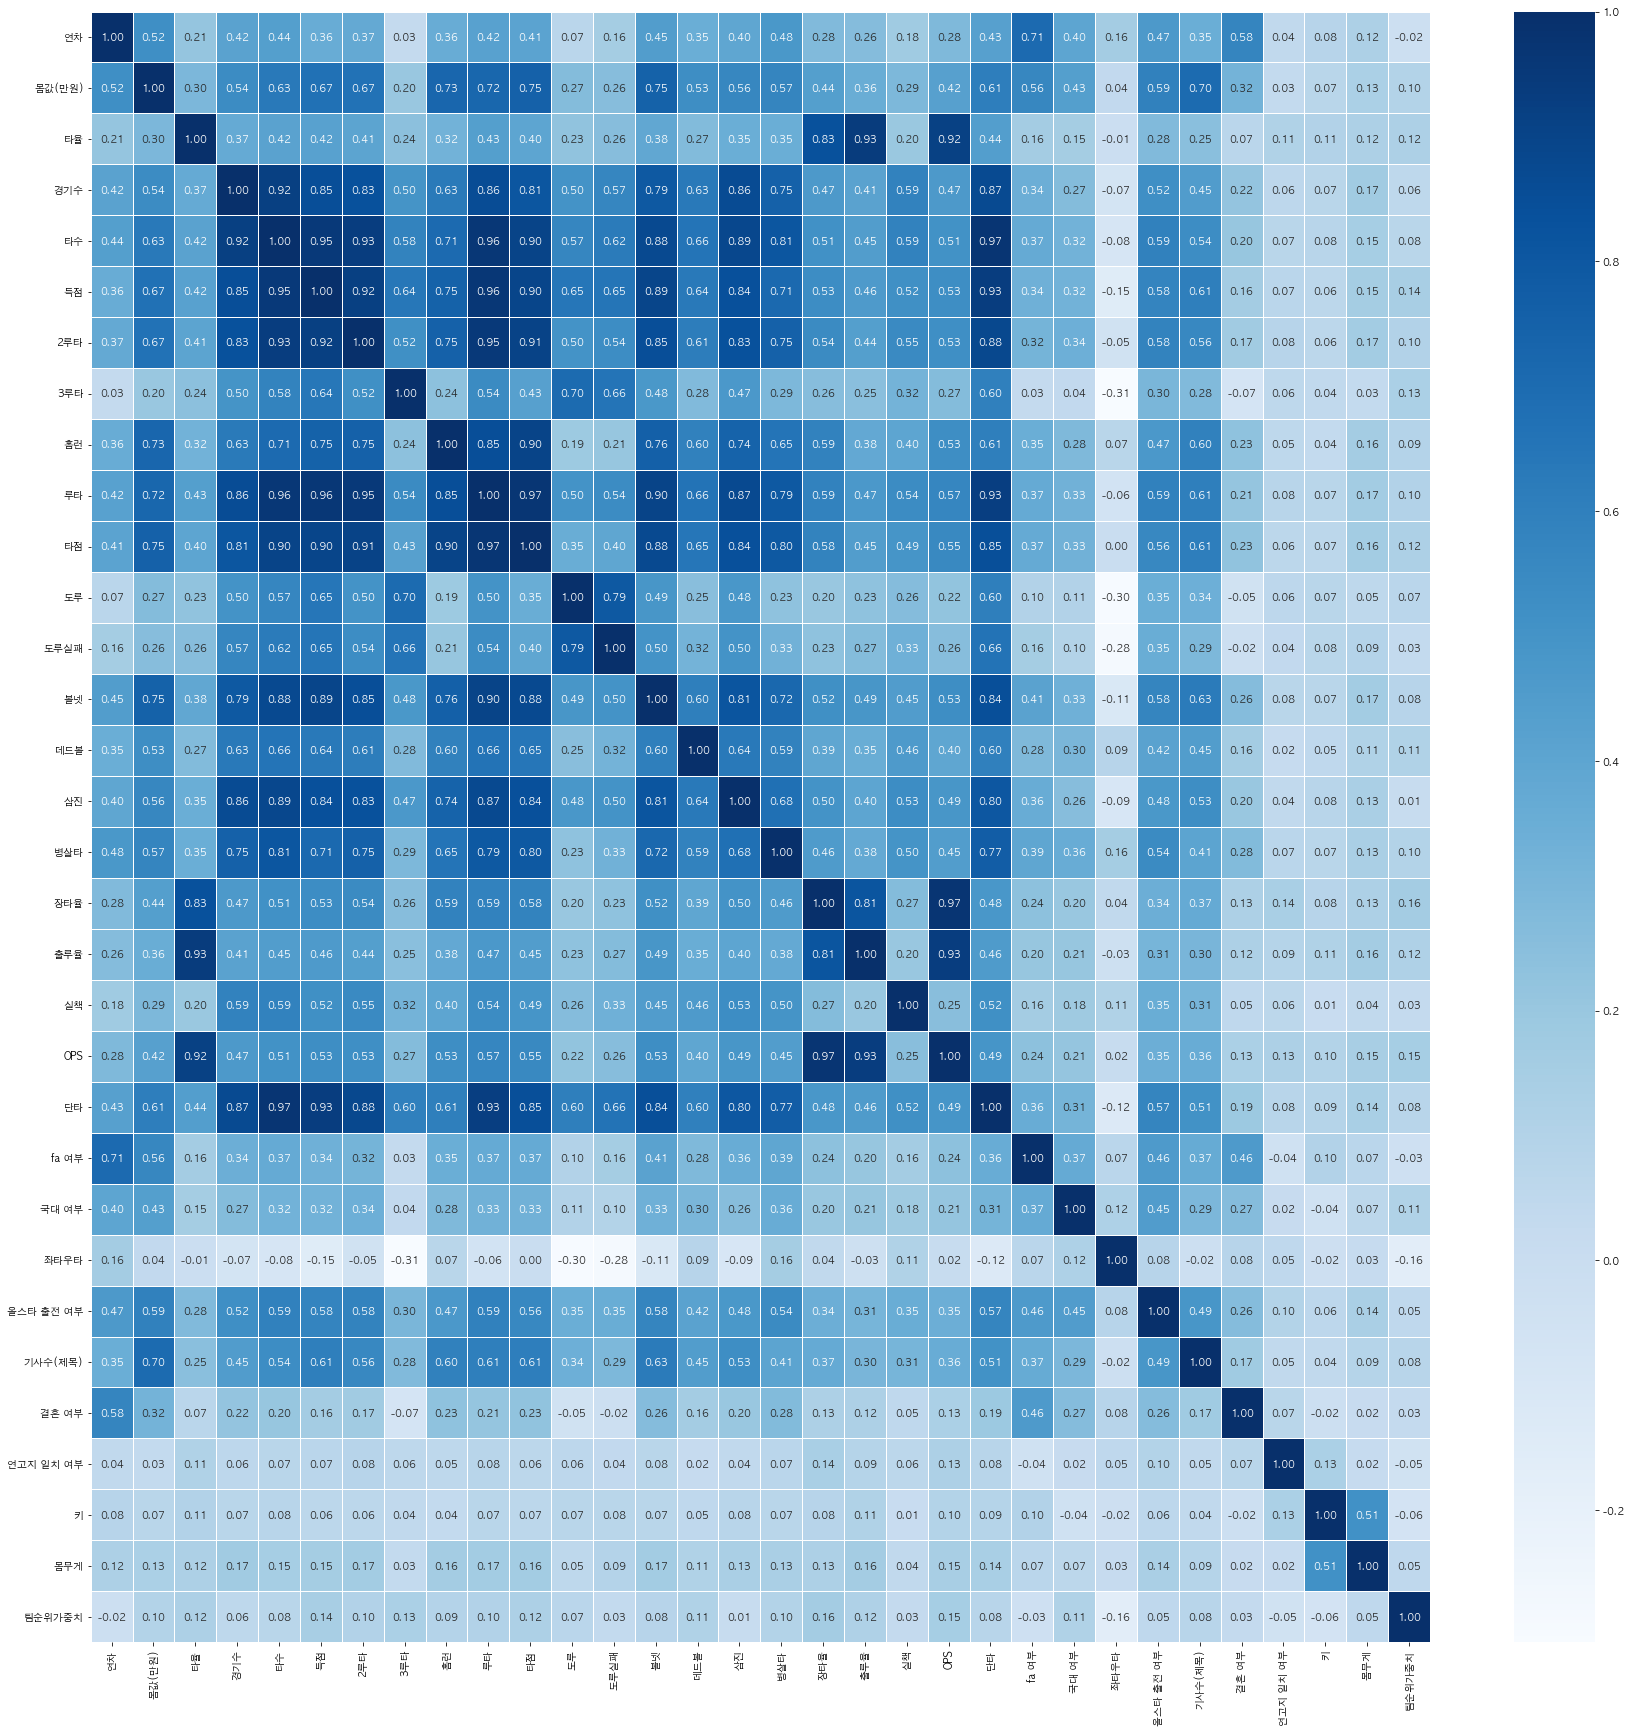

In [10]:
# correlation coefficient heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_coefficient, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

타겟변수인 몸값(만원) 과 관련있는 독립변수는 
- 0.7 이상 : 홈런, 루타, 타점, 볼넷, 기사수(제목)
- 0.6 ~ 0.7 : 타수, 득점, 2루타, 단타
- 0.5 ~ 0.6 : 연차, 경기수, 데드볼, 삼진, 병살타, fa여부, 올스타 출전 여부

또한, 기타 독립변수들 간의 상관관계가 매우 높게 나타났고, 특정 독립변수 간 높은 다중공선성이 존재할 것으로 예상할 수 있었다.

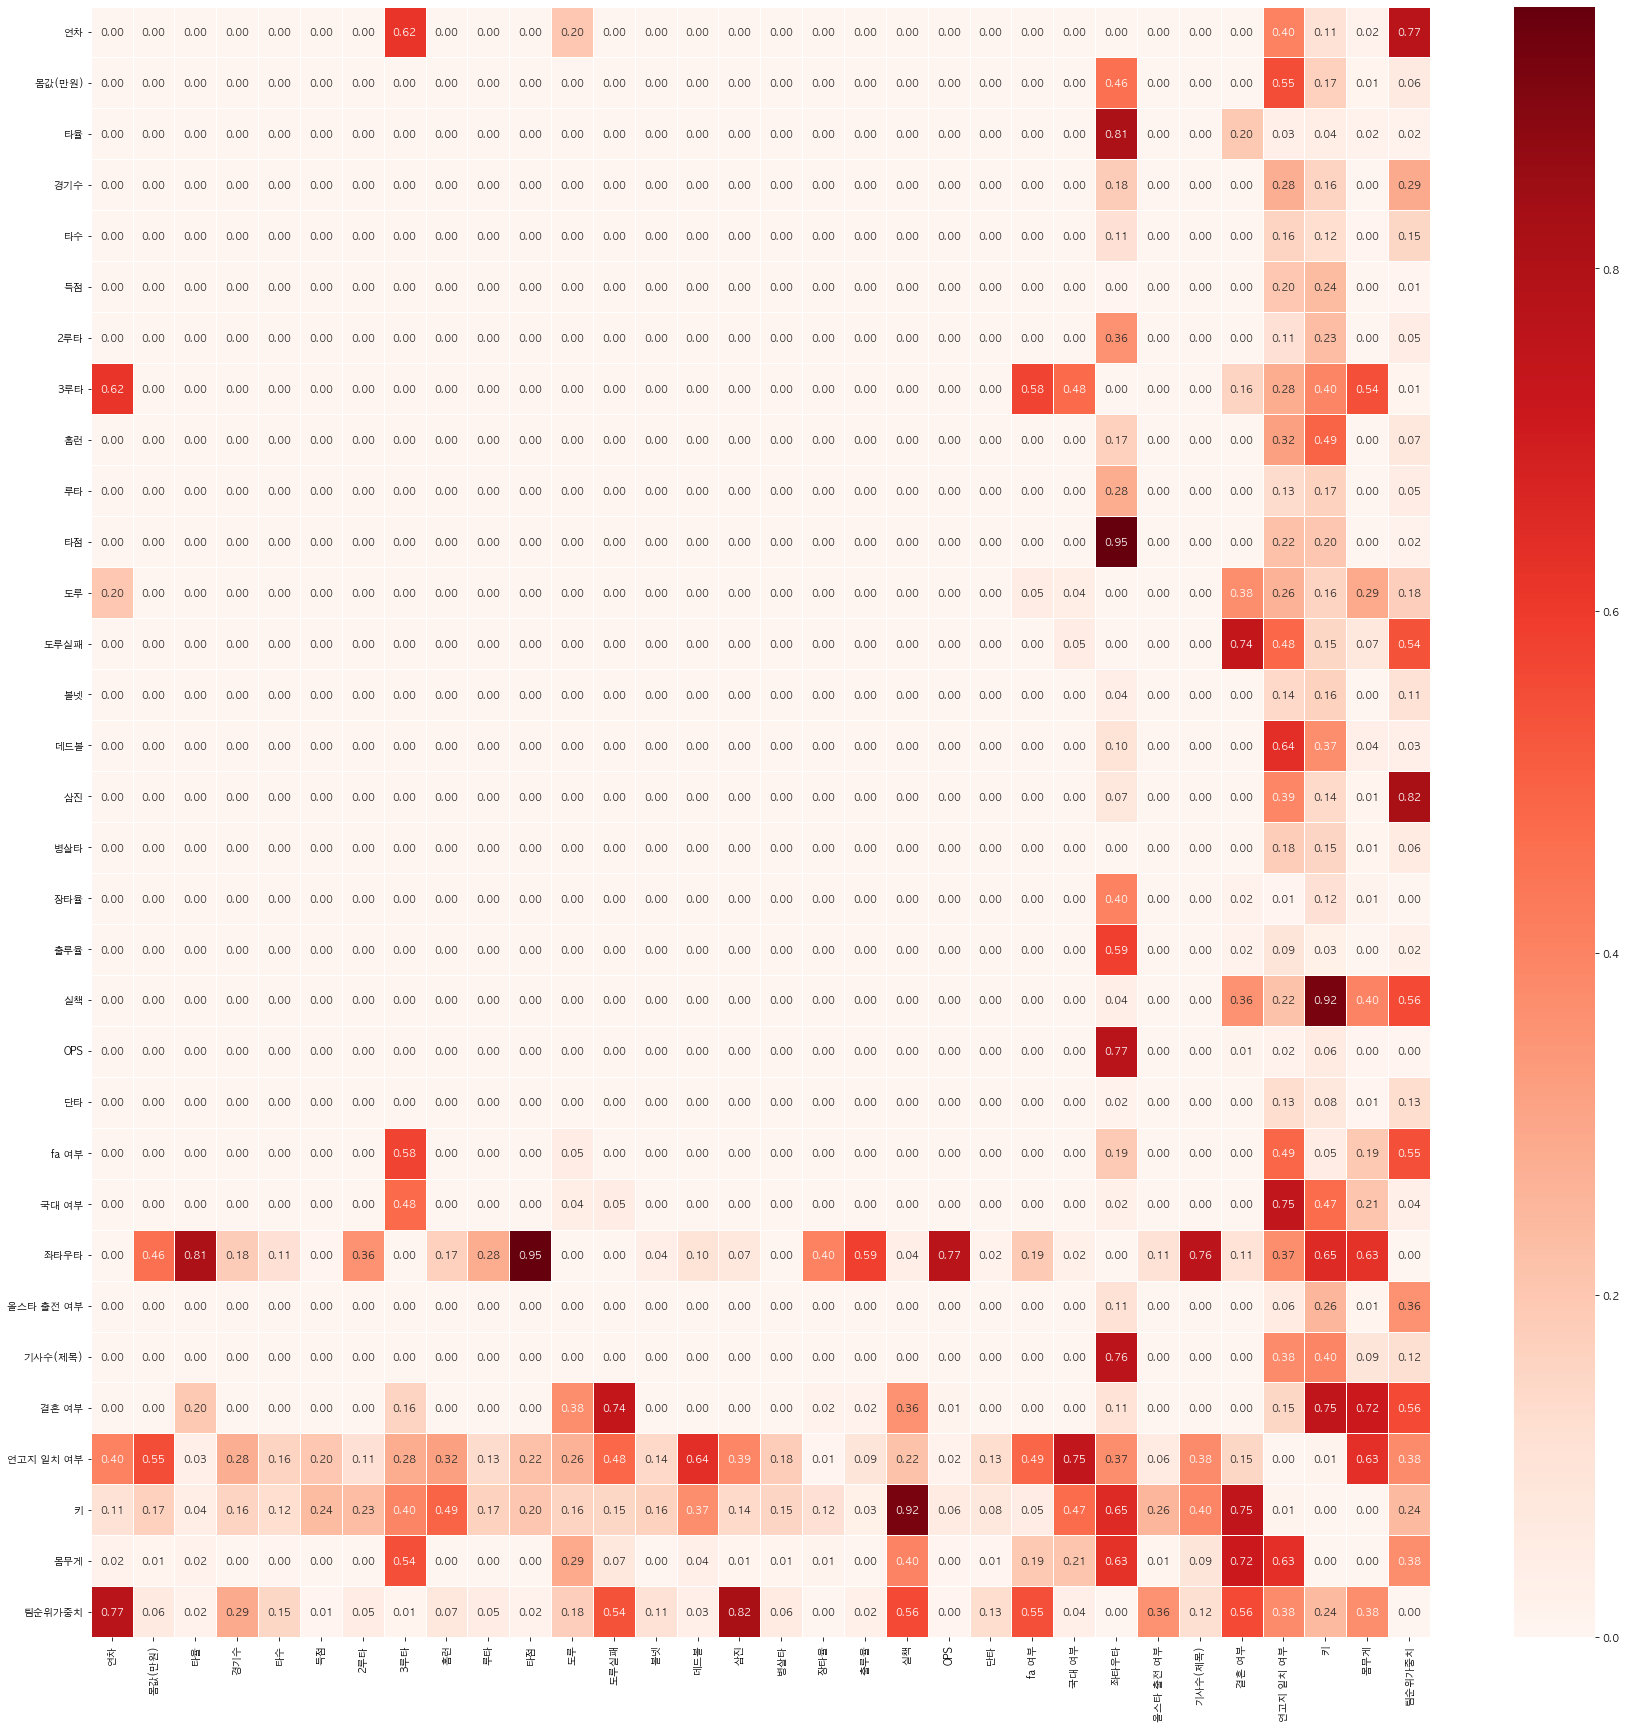

In [11]:
# correlation P-values heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_p_values, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
plt.show()

# 주성분분석 및 PCA 차원 축소

타자의 경기력 관련 세이버매트릭스 지표인 saber_lst를 생성하여, 이들의 다중공선성을 VIF지수를 통해 확인한다.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF 계산을 위해 상수항 열 추가
df_saber = df[saber_lst]
cut_1516 = df_saber.drop('루타', axis=1)
df_with_const = add_constant(cut_1516)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# VIF 값 출력
vif_data

,Variable,VIF
0,const,11.334309
1,타율,9.522951
2,경기수,8.983818
3,타수,136.535296
4,득점,30.819571
5,2루타,12.505671
6,3루타,2.890852
7,홈런,16.316063
8,타점,31.064349
9,도루,4.286039


VIF 10 이상인 변수는 타수, 득점, 2루타, 루타, 홈런, 타점, OPS, 단타 

또한 상관분석에서 타 독립변수와 강한 상관관계를 보이는 '경기수' 변수로 인해 나타나는 높은 다중공선성을

pca 차원 축소를 통해 다중공선성을 제거하기로 결정하였다.

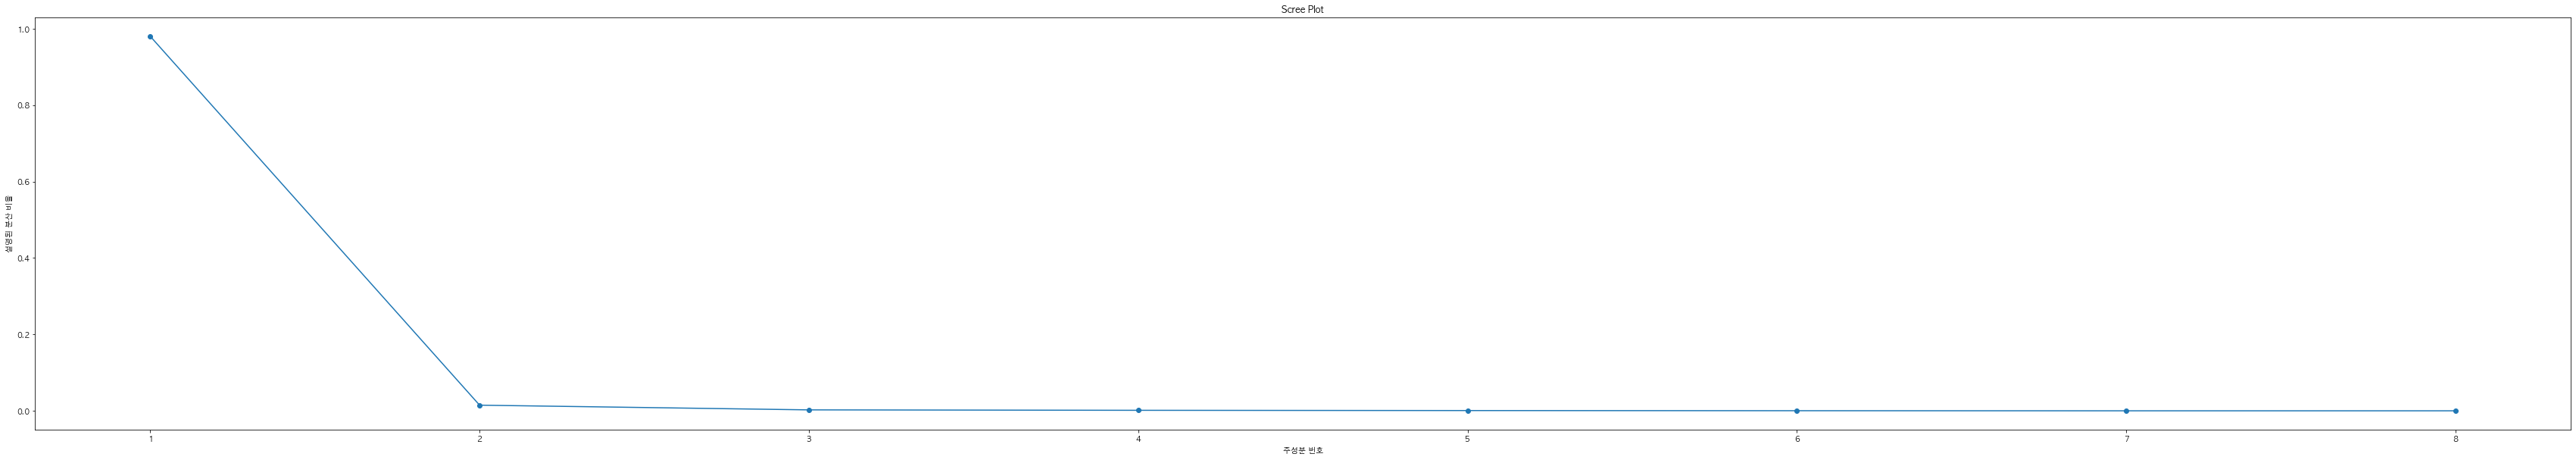

In [13]:
# scree plot
vif10 = ['타수', '득점', '2루타', '루타', '홈런', '타점', 'OPS', '단타']
data = df_saber[vif10]

# 데이터의 평균 계산
mean = np.mean(data, axis=0)

# 공분산 행렬 계산
cov_matrix = np.cov(data, rowvar=False)

# 공분산 행렬의 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Scree plot 그리기
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(60, 10))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title("Scree Plot")
plt.xlabel("주성분 번호")
plt.ylabel("설명된 분산 비율")
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.show()

- scree plot을 통해 해당 변수들은 2개의 주성분으로 축소하는 것이 옳다고 판단하였다.

PCA 차원축소를 통해 해당 독립변수들을 2개의 주성분으로 축소하는 과정

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 스케일링
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# PCA 모델 초기화
n_components = 2  # 원하는 차원 수
pca = PCA(n_components=n_components)

# PCA 모델 훈련 및 데이터 변환
pca_result = pca.fit_transform(data_scaled)

# 결과 데이터프레임 생성
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df

,PC1,PC2
0,0.120920,-0.194460
1,-0.444374,-0.016949
2,-0.646739,0.052086
3,-0.694448,-0.030666
4,-0.695254,-0.030125
...,...,...
363,-0.647918,-0.016163
364,1.215992,0.170785
365,1.176052,0.194683
366,-0.695254,-0.030125


pca1은 득점생산능력에 관련한 지표,

pca2는 장타에 관련한 지표임을 유추해볼 수 있다.

In [15]:
df_p = df.copy()
for col in vif10:
    df_p.drop(col, axis=1, inplace=True)
df_p.drop('이름', axis=1, inplace=True)
df_p.drop('연도', axis=1, inplace=True)
df_p.drop('팀명', axis=1, inplace=True)
df_p.drop('몸값(만원)', axis=1, inplace=True)
df_p.drop('장타율', axis=1, inplace=True)
df_p.drop('출루율', axis=1, inplace=True)
df_p['PC1'] = pca_df['PC1']
df_p['PC2'] = pca_df['PC2']

In [16]:
df_p.columns

Index(['연차', '타율', '경기수', '3루타', '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '실책',
       'fa 여부', '국대 여부', '좌타우타', '올스타 출전 여부', '기사수(제목)', '결혼 여부', '연고지 일치 여부',
       '키', '몸무게', '팀순위가중치', 'PC1', 'PC2'],
      dtype='object')

In [17]:
# 각 주성분의 고유벡터 가져오기
eigen_vectors = pca.components_

# 주성분의 고유벡터 출력
for i, eigenvector in enumerate(eigen_vectors):
    print(f"PC{i + 1} (Eigenvalue: {pca.explained_variance_ratio_[i]:.2f}) = {eigenvector}")
# 각 차원별로 절댓값 크기 상위 5개와 그 인덱스 추출
abs_values = np.abs(eigen_vectors)  # 배열의 절댓값 계산

# 각 차원별로 상위 5개 인덱스 추출 (절댓값 크기 내림차순)
top_indices = np.argsort(-abs_values, axis=1)[:, :3]  # 각 행에서 상위 5개 인덱스 추출

# 결과 출력
lst_pca1 = list(top_indices[0])
lst_pca2 = list(top_indices[1])

lst1 = []
lst2 = []

for i in lst_pca1:
    lst1.append(data.columns[i])
for i in lst_pca2:
    lst2.append(data.columns[i])
      
print('pca1의 분산에 가장 큰 영향을 준 변수 상위 3개')
print(lst1)
print('pca2에의 분산에 가장 큰 영향을 준 변수 상위 3개')
print(lst2)

PC1 (Eigenvalue: 0.90) = [0.48228704 0.39505034 0.36859221 0.39187577 0.21714023 0.36014886
 0.12002497 0.36144784]
PC2 (Eigenvalue: 0.05) = [-0.32447139 -0.12317868  0.01099864  0.12672328  0.65422499  0.39019694
  0.27641572 -0.45463823]
pca1의 분산에 가장 큰 영향을 준 변수 상위 3개
['타수', '득점', '루타']
pca2에의 분산에 가장 큰 영향을 준 변수 상위 3개
['홈런', '단타', '타점']


In [18]:
# loading 값 확인
df_l = df.copy()
df_l['PC1'] = pca_df['PC1']
df_l['PC2'] = pca_df['PC2']
loading_corr = df_l.corr()
lst = ['연차', '연도', '몸값(만원)', '타율', '경기수', '타수', '득점', '2루타', '3루타',
       '홈런', '루타', '타점', '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '장타율', '출루율',
       '실책', 'OPS', '단타', 'fa 여부', '국대 여부', '좌타우타', '올스타 출전 여부', '기사수(제목)',
       '결혼 여부', '연고지 일치 여부', '키', '몸무게', '팀순위가중치']
for col in lst:
    loading_corr.drop(col, axis=0, inplace=True)
# 소수점 네 번째 자리까지 반올림
rounded_df = loading_corr.T.round(7)
rounded_df

,PC1,PC2
연차,0.422712,0.008361
연도,0.012699,0.003474
몸값(만원),0.702870,0.270351
타율,0.448367,0.128805
경기수,0.884316,-0.157977
타수,0.981100,-0.153423
득점,0.971331,-0.070398
2루타,0.958918,0.006651
3루타,0.560367,-0.340862
홈런,0.803257,0.562534


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
new_saber = ['PC1', 'PC2', '타율', '경기수', '3루타', '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '실책']
# VIF 계산을 위해 상수항 열 추가
x_data3 = df_p[new_saber]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = x_data3.columns
vif_data["VIF"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]

# VIF 값 출력
vif_data

,Variable,VIF
0,PC1,3.858831
1,PC2,1.973120
2,타율,7.107524
3,경기수,22.394105
4,3루타,3.033467
5,도루,4.821693
6,도루실패,5.159467
7,볼넷,9.483240
8,데드볼,3.342796
9,삼진,14.135235


10이상의 vif지수가 나타나지 않는 것으로 보아 다중공선성이 일정 수준 제거되었음을 알 수 있다.

# 다중회귀분석

In [20]:
new_numerical_features = ['PC1', 'PC2', '연차', '타율', '경기수', '3루타',
       '도루', '도루실패', '볼넷', '데드볼', '삼진', '병살타', '실책', '기사수(제목)', '팀순위가중치', '키', '몸무게', 'fa 여부', '국대 여부', '좌타우타', '올스타 출전 여부',
       '결혼 여부', '연고지 일치 여부'] # 총 23개

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df_numerical = df_p[new_numerical_features]
# Min-Max 스케일러 객체 생성
scaler = MinMaxScaler()
# Min-Max 스케일링 적용
scaled_df = scaler.fit_transform(df_numerical)
scaled_df = pd.DataFrame(scaled_df, columns=df_numerical.columns)
scaled_df[categorical_features] = df_p[categorical_features]
scaled_df

,PC1,PC2,연차,타율,경기수,3루타,도루,도루실패,볼넷,데드볼,...,기사수(제목),팀순위가중치,키,몸무게,fa 여부,국대 여부,좌타우타,올스타 출전 여부,결혼 여부,연고지 일치 여부
0,0.351227,0.317584,0.111111,0.257,0.832168,0.307692,0.066667,0.15,0.370370,0.208333,...,0.065574,0.444444,0.60,0.09375,0,0,0,0,0,0
1,0.108202,0.459223,0.166667,0.158,0.314685,0.153846,0.000000,0.00,0.074074,0.083333,...,0.065574,0.444444,0.60,0.09375,0,0,0,0,0,0
2,0.021203,0.514308,0.055556,0.200,0.020979,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.777778,0.60,0.25000,0,0,0,0,0,0
3,0.000692,0.448278,0.111111,0.000,0.006993,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.777778,0.60,0.25000,0,0,0,0,0,0
4,0.000346,0.448710,0.055556,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.777778,0.44,0.21875,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.020696,0.459850,0.055556,0.083,0.223776,0.000000,0.016667,0.00,0.000000,0.000000,...,0.003279,0.777778,0.48,0.18750,0,0,1,0,0,0
364,0.822010,0.609019,0.444444,0.290,1.000000,0.153846,0.183333,0.50,0.444444,0.166667,...,0.534426,0.222222,0.72,0.46875,1,1,1,1,0,0
365,0.804839,0.628088,0.500000,0.335,0.881119,0.384615,0.416667,0.50,0.453704,0.166667,...,0.534426,0.222222,0.72,0.46875,1,1,1,1,0,0
366,0.000346,0.448710,0.166667,0.000,0.006993,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.222222,0.64,0.25000,0,0,0,0,0,0


In [22]:
import statsmodels.api as sm
# crim, rm, lstat을 통한 다중 선형회귀분석
x_data3 = scaled_df #변수 여러개
target3 = df[["몸값(만원)"]]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data3, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target3, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 몸값(만원)   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     56.58
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          3.80e-102
Time:                        16:55:30   Log-Likelihood:                -3988.9
No. Observations:                 368   AIC:                             8026.
Df Residuals:                     344   BIC:                             8120.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.903e+04   5426.507     -3.507      0.001   -2.97e+04   -8359.577
PC1         5.913e+04   1.04e+04      5.664      0.000    3.86e+04    7.97e+04
PC2         4.398e+04   8852.941      4.967      0.000    2.66e+04    6.14e+04
연차          6193.1726   4599.916      1.346      0.179   -2854.330    1.52e+04
타율          -1.67e+04   7576.065     -2.204      0.028   -3.16e+04   -1798.007
경기수        -1531.9252   5547.834     -0.276      0.783   -1.24e+04    9380.022
3루타        -2.362e+04   7775.053     -3.038      0.003   -3.89e+04   -8326.627
도루          1.505e+04   9180.530      1.640      0.102   -3002.736    3.31e+04
도루실패       -7108.4749   7771.254     -0.915      0.361   -2.24e+04    8176.681
볼넷          3.648e+04   7673.528      4.753      0.000    2.14e+04    5.16e+04
데드볼         1.092e+04   5254.520      2.079      0.038     589.839    2.13e+04
삼진         -4.421e+04   7841.838     -5.638      0.000   -5.96e+04   -2.88e+04
병살타        -8755.8995   6000.550     -1.459      0.145   -2.06e+04    3046.487
실책         -6597.3349   4303.080     -1.533      0.126   -1.51e+04    1866.325
기사수(제목)     4.603e+04   6823.914      6.746      0.000    3.26e+04    5.95e+04
팀순위가중치        63.4941   2249.780      0.028      0.978   -4361.562    4488.550
키           4836.9467   4653.078      1.040      0.299   -4315.118     1.4e+04
몸무게        -4785.8076   5197.845     -0.921      0.358    -1.5e+04    5437.750
fa 여부       1.295e+04   2499.178      5.183      0.000    8037.507    1.79e+04
국대 여부       3647.3603   1704.601      2.140      0.033     294.607    7000.114
좌타우타        -514.9144   1662.774     -0.310      0.757   -3785.398    2755.569
올스타 출전 여부   4178.1847   2029.421      2.059      0.040     186.550    8169.820
결혼 여부       -342.6016   1829.960     -0.187      0.852   -3941.920    3256.717
연고지 일치 여부  -1279.6175   1575.959     -0.812      0.417   -4379.346    1820.111
==============================================================================
Omnibus:                      114.040   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.115
Skew:                           1.114   Prob(JB):                    6.57e-170
Kurtosis:                       9.771   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
coefficients = fitted_multi_model.params
coefficients_with_names = list(coefficients.items())
positive_tuples = [item for item in coefficients_with_names if item[1] > 0]
negative_tuples = [item for item in coefficients_with_names if item[1] < 0]

In [24]:
# 회귀계수가 양수인 변수들, 회귀계수 값. 높을 수록 큰 양의 영향력
p_coef_descending = sorted(positive_tuples, key=lambda x: x[1], reverse=True)
df_p_coef_descending = pd.DataFrame(p_coef_descending, columns=['변수', '회귀계수'])
df_p_coef_descending

,변수,회귀계수
0,PC1,59133.904162
1,기사수(제목),46034.472758
2,PC2,43975.387646
3,볼넷,36475.520293
4,도루,15054.300638
5,fa 여부,12953.099195
6,데드볼,10924.871080
7,연차,6193.172580
8,키,4836.946688
9,올스타 출전 여부,4178.184741


In [25]:
# 회귀계수가 음수인 변수들, 회귀계수 값. 절댓값이 클 수로고 큰 음의 영향력
n_coef_ascending = sorted(negative_tuples, key=lambda x: x[1])
df_n_coef_ascending = pd.DataFrame(n_coef_ascending, columns=['변수', '회귀계수'])
df_n_coef_ascending

,변수,회귀계수
0,삼진,-44214.853838
1,3루타,-23619.254812
2,const,-19032.887305
3,타율,-16699.249120
4,병살타,-8755.899468
5,도루실패,-7108.474873
6,실책,-6597.334908
7,몸무게,-4785.807576
8,경기수,-1531.925165
9,연고지 일치 여부,-1279.617464


In [26]:
# 변수 별 p_value, 오름차순 정렬. 0.05 이하면 유의하다 판단
p_values = fitted_multi_model.pvalues
variables_with_pvalues = list(p_values.items())
n_pvalues_ascending = sorted(variables_with_pvalues, key=lambda x: x[1])
df_n_pvalues_ascending = pd.DataFrame(n_pvalues_ascending, columns=['변수', 'p-value'])
df_n_pvalues_ascending = df_n_pvalues_ascending.round(4)
df_n_pvalues_ascending

,변수,p-value
0,기사수(제목),0.0000
1,PC1,0.0000
2,삼진,0.0000
3,fa 여부,0.0000
4,PC2,0.0000
5,볼넷,0.0000
6,const,0.0005
7,3루타,0.0026
8,타율,0.0282
9,국대 여부,0.0331


# Clustering

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import io

1. minmax scailing 되어 있으므로 다 같이 넣고 군집분석
2. 연속형 변수, 이진 변수 각각 클러스터링 후 군집쌍 ex) 1-2, 3-1, ... 을 분석

In [28]:
df_k = scaled_df[['PC1', '기사수(제목)', '볼넷', '데드볼', 'PC2', '삼진', '타율', '3루타', '도루실패', '병살타']]
df_k

,PC1,기사수(제목),볼넷,데드볼,PC2,삼진,타율,3루타,도루실패,병살타
0,0.351227,0.065574,0.370370,0.208333,0.317584,0.360248,0.257,0.307692,0.15,0.136364
1,0.108202,0.065574,0.074074,0.083333,0.459223,0.186335,0.158,0.153846,0.00,0.227273
2,0.021203,0.000000,0.000000,0.000000,0.514308,0.000000,0.200,0.000000,0.00,0.000000
3,0.000692,0.000000,0.000000,0.000000,0.448278,0.006211,0.000,0.000000,0.00,0.000000
4,0.000346,0.000000,0.000000,0.000000,0.448710,0.006211,0.000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...
363,0.020696,0.003279,0.000000,0.000000,0.459850,0.031056,0.083,0.000000,0.00,0.000000
364,0.822010,0.534426,0.444444,0.166667,0.609019,0.757764,0.290,0.153846,0.50,0.636364
365,0.804839,0.534426,0.453704,0.166667,0.628088,0.409938,0.335,0.384615,0.50,0.454545
366,0.000346,0.000000,0.000000,0.000000,0.448710,0.000000,0.000,0.000000,0.00,0.000000


## Hierarchical

### Scipy Hierarchical Clustering

In [29]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

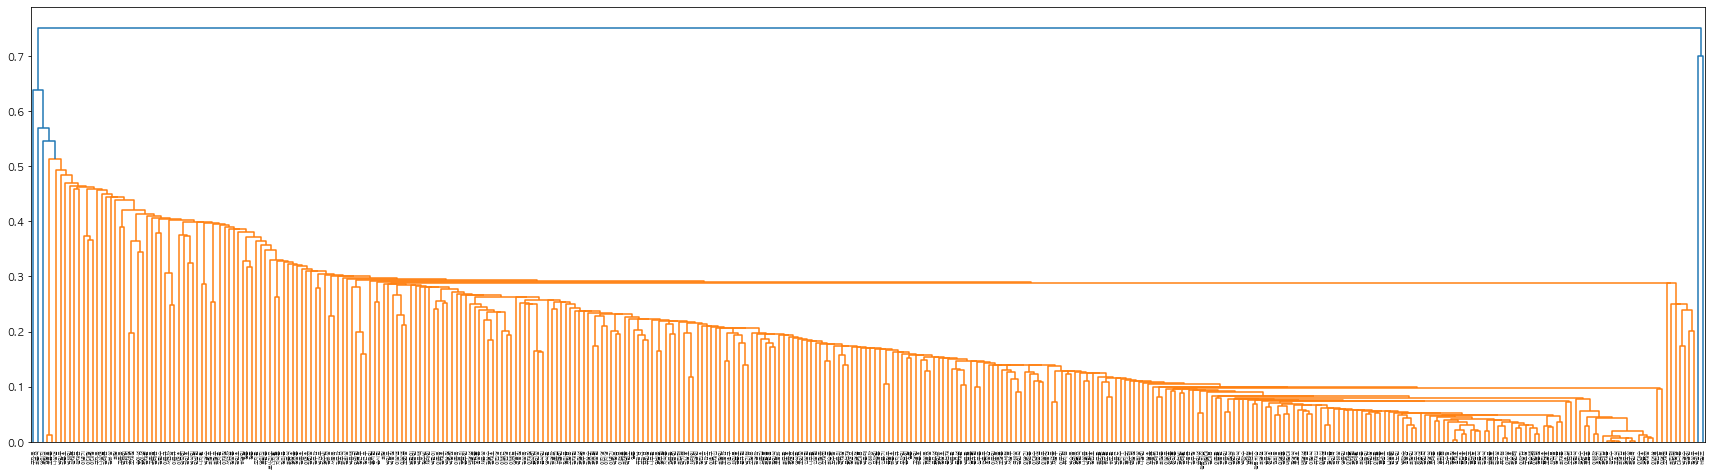

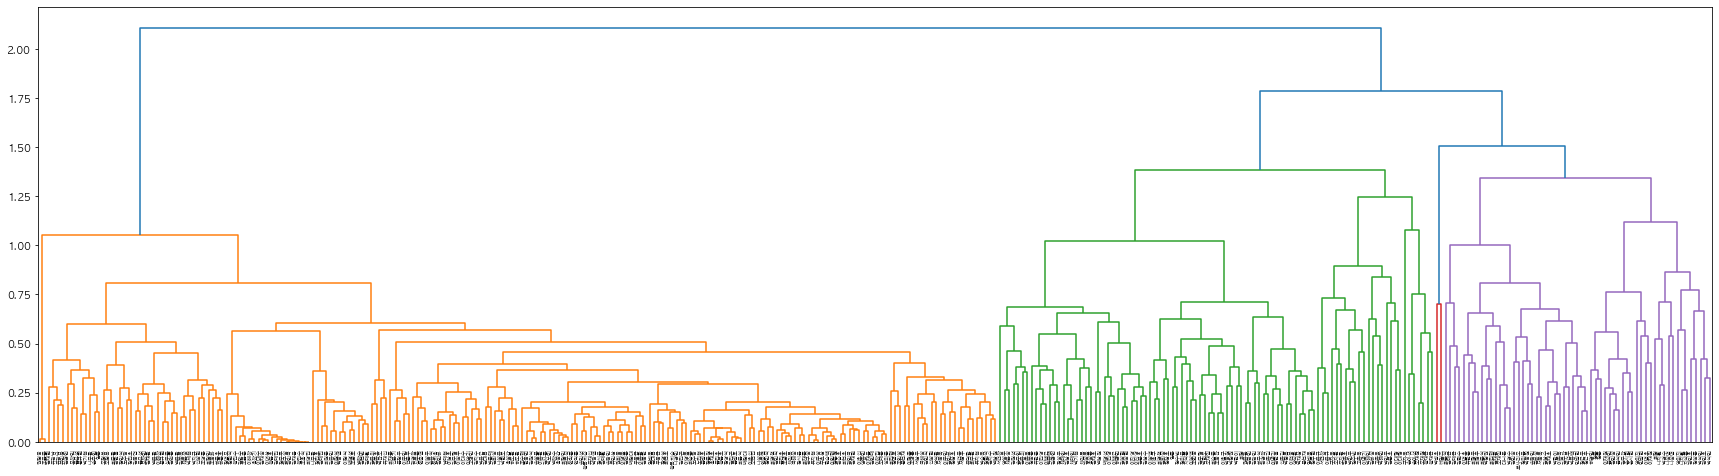

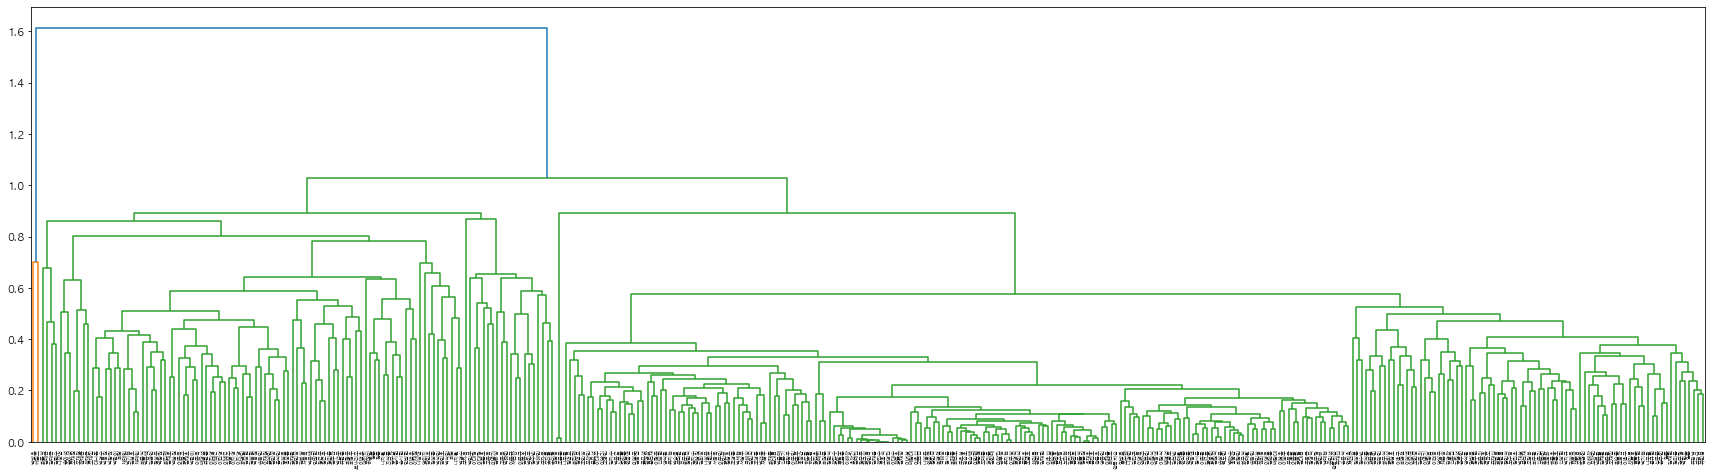

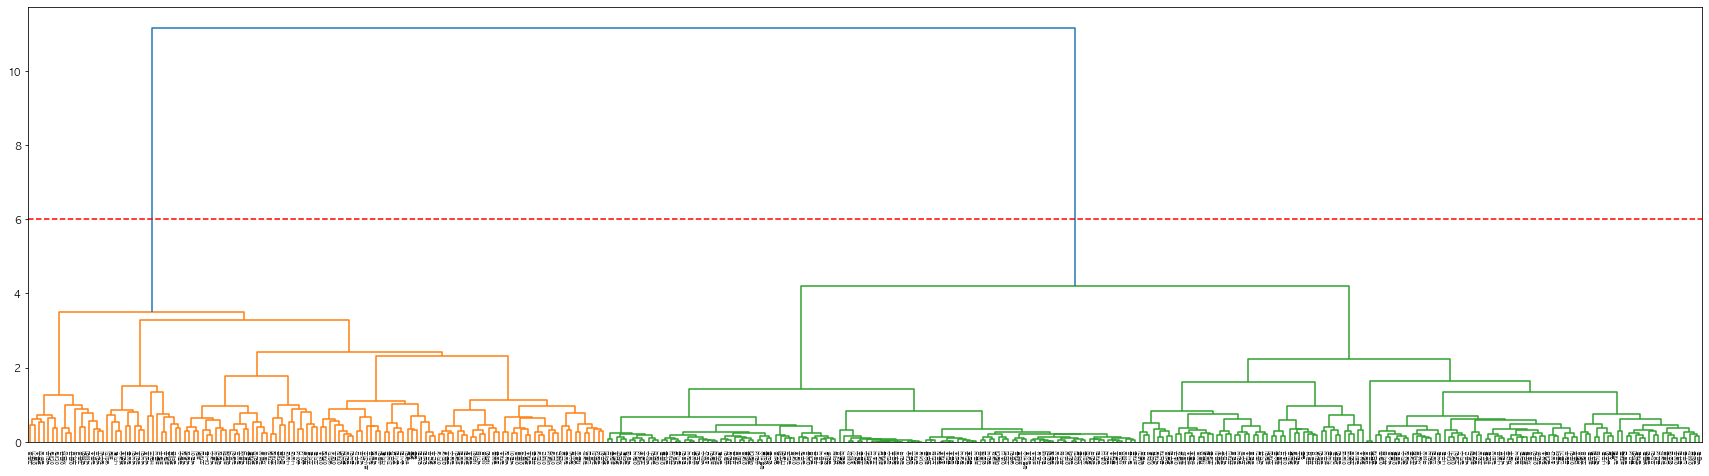

In [30]:
name=list(df['이름'])
methods = ['single', 'complete', 'average', 'ward']
for method in methods:
    Z = linkage(df_k, method)
    fig = plt.figure(figsize=(30, 8))
    dn = dendrogram(Z, labels = name) # dendrogram 시각화
    plt.axhline(6, color = 'r', ls = '--')
    plt.show()

### scikit-learn Hierarchical Clustering (Agglomerative)

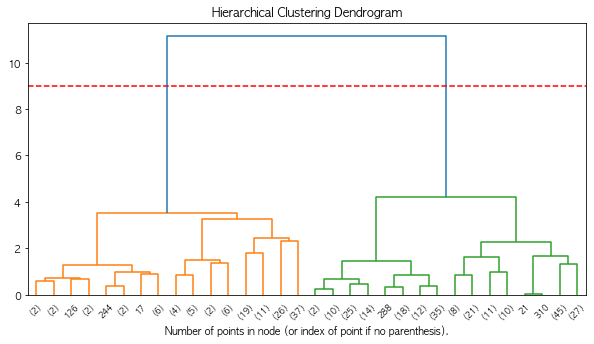

In [31]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_full_tree=True)

model = model.fit(df_k)
plt.figure(figsize= (10, 5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4) 
plt.axhline(9, color = 'r', ls = '--')# p: 최대분기수. 늘려가면서 해석에 이용할 수 있다. ()괄호안에 들어가 있는 것은 밑에 합쳐져있는 것들의 합
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

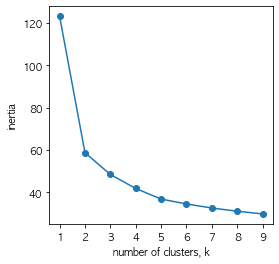

In [32]:
# # 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_k)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [33]:
kmeansModel = KMeans(n_clusters=4)
kmeansModel.fit(df_k)
df_c = df_k.copy()
df_c['cluster'] = kmeansModel.fit_predict(df_k)

In [34]:
pca_corr = PCA()
pca_corr.fit(df_k)
pca_corr_ = pca_corr.fit_transform(df_k)[:,0:2]
name=list(df['이름'])
df_pca = pd.DataFrame(pca_corr_, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_c['cluster']
df_pca

,PC1,PC2,cluster
0,0.154875,0.218595,3
1,-0.239796,-0.019156,1
2,-0.542976,-0.017267,1
3,-0.570527,0.012213,1
4,-0.570717,0.012012,1
...,...,...,...
363,-0.540922,0.007270,1
364,0.929735,0.054485,2
365,0.749675,0.217415,0
366,-0.573268,0.011956,1


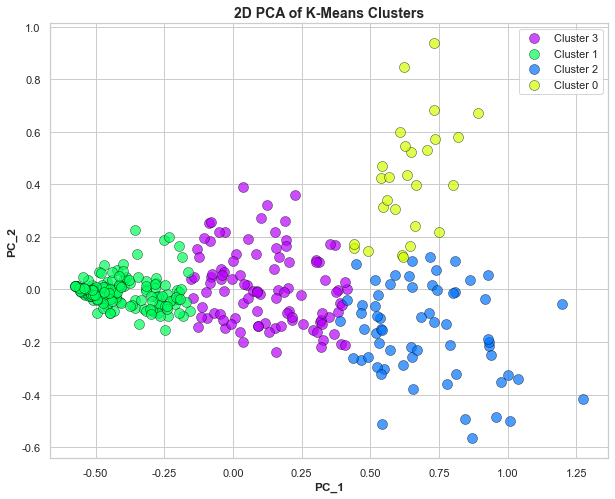

In [35]:
# Seaborn 스타일 설정
sns.set(style='whitegrid')

# 클러스터별로 데이터 시각화
plt.figure(figsize=(10, 8))
palette = sns.color_palette('hsv', n_colors=len(df_pca['cluster'].unique()))  # 다채로운 컬러 팔레트

for cluster in df_pca['cluster'].unique():
    cluster_subset = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_subset['PC1'], cluster_subset['PC2'], 
                color=palette[cluster], label=f'Cluster {cluster}', 
                alpha=0.7, s=100, edgecolor='black', linewidth=0.5)

# 시각적 요소 추가
plt.xlabel('PC_1', fontsize=12, weight='bold')
plt.ylabel('PC_2', fontsize=12, weight='bold')
plt.title('2D PCA of K-Means Clusters', fontsize=14, weight='bold')
plt.legend()
plt.show()

In [36]:
# loading 값 확인
df_e = df_k.copy()
df_e['PC_1'] = df_pca['PC1']
df_e['PC_2'] = df_pca['PC2']
loading_corr = df_e.corr()
lst = ['PC1', '기사수(제목)', '볼넷', '데드볼', 'PC2', '삼진', '타율', '3루타', '도루실패', '병살타']
for col in lst:
    loading_corr.drop(col, axis=0, inplace=True)
# 소수점 네 번째 자리까지 반올림
rounded_df = loading_corr.T.round(7)
rounded_df

,PC_1,PC_2
PC1,0.980795,0.028525
기사수(제목),0.622318,-0.107828
볼넷,0.927715,-0.017785
데드볼,0.725799,-0.228674
PC2,-0.006808,-0.689788
삼진,0.907216,0.007666
타율,0.437363,-0.015494
3루타,0.550993,0.639471
도루실패,0.586019,0.711489
병살타,0.834136,-0.280311


In [37]:
result = pd.concat([df_k, pd.DataFrame(kmeansModel.labels_, columns=['Cluster'])], axis=1)
Profiles = result.groupby('Cluster').mean()

In [38]:
result = pd.concat([df_k, pd.DataFrame(kmeansModel.labels_, columns=['Cluster'])], axis=1)
result['팀명'] = df['팀명']
result['이름'] = df['이름']
df_cluster = pd.concat([df, pd.DataFrame(kmeansModel.labels_, columns=['Cluster'])], axis=1)
df_cluster

,이름,연차,연도,팀명,몸값(만원),타율,경기수,타수,득점,2루타,...,국대 여부,좌타우타,올스타 출전 여부,기사수(제목),결혼 여부,연고지 일치 여부,키,몸무게,팀순위가중치,Cluster
0,강경학,3,2015,한화,6500,0.257,120,311,50,7,...,0,0,0,20,0,0,180,72,4,3
1,강경학,4,2016,한화,6200,0.158,46,101,16,3,...,0,0,0,20,0,0,180,72,4,1
2,강구성,2,2015,NC,2700,0.200,4,5,0,1,...,0,0,0,0,0,0,180,82,7,1
3,강구성,3,2016,NC,2700,0.000,2,3,0,0,...,0,0,0,0,0,0,180,82,7,1
4,강민국,2,2015,NC,2700,0.000,1,2,0,0,...,1,1,0,0,0,0,176,80,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,황윤호,2,2016,NC,3000,0.083,33,12,7,0,...,0,1,0,1,0,0,177,78,7,1
364,황재균,9,2015,롯데,50000,0.290,144,534,95,41,...,1,1,1,163,0,0,183,96,2,2
365,황재균,10,2016,롯데,120000,0.335,127,498,97,26,...,1,1,1,163,0,0,183,96,2,0
366,황진수,4,2015,롯데,2800,0.000,2,2,0,0,...,0,0,0,0,0,0,181,82,2,1


In [39]:
# 원본 데이터에 대한 군집 별 평균값
grouped_data = df_cluster.groupby('Cluster')
mean_data = grouped_data.mean()
mean_data

,연차,연도,몸값(만원),타율,경기수,타수,득점,2루타,3루타,홈런,...,fa 여부,국대 여부,좌타우타,올스타 출전 여부,기사수(제목),결혼 여부,연고지 일치 여부,키,몸무게,팀순위가중치
Cluster,,,,,,,,,,,,,,,,,,,,,
0,7.333333,2015.481481,35600.000000,0.310074,128.481481,477.185185,86.703704,23.851852,5.259259,7.962963,...,0.333333,0.370370,0.111111,0.777778,69.703704,0.185185,0.444444,182.259259,85.407407,5.481481
1,4.615819,2015.525424,6060.451977,0.215492,36.169492,52.474576,7.920904,2.186441,0.146893,0.864407,...,0.050847,0.209040,0.649718,0.090395,8.141243,0.209040,0.237288,180.661017,83.858757,4.468927
2,9.650794,2015.523810,54123.809524,0.309238,129.888889,454.301587,78.047619,26.634921,1.523810,20.571429,...,0.444444,0.682540,0.746032,0.746032,67.460317,0.507937,0.269841,181.507937,88.825397,4.984127
3,7.930693,2015.514851,18410.891089,0.270455,103.019802,277.702970,38.425743,12.485149,1.138614,6.386139,...,0.287129,0.287129,0.603960,0.376238,22.663366,0.396040,0.237624,181.524752,85.079208,3.990099


In [40]:
# 클러스터링에 집어넣은 데이터셋에서 군집별 평균값
Profiles

,PC1,기사수(제목),볼넷,데드볼,PC2,삼진,타율,3루타,도루실패,병살타
Cluster,,,,,,,,,,
0,0.648226,0.228537,0.486626,0.237654,0.298520,0.495744,0.310074,0.404558,0.516667,0.346801
1,0.074125,0.026693,0.040908,0.040490,0.489850,0.083588,0.215492,0.011299,0.030226,0.051361
2,0.689556,0.221181,0.537184,0.365741,0.557953,0.531993,0.309238,0.117216,0.153175,0.563492
3,0.357000,0.074306,0.243124,0.198020,0.436201,0.350839,0.270455,0.087586,0.139109,0.284878


In [41]:
result

,PC1,기사수(제목),볼넷,데드볼,PC2,삼진,타율,3루타,도루실패,병살타,Cluster,팀명,이름
0,0.351227,0.065574,0.370370,0.208333,0.317584,0.360248,0.257,0.307692,0.15,0.136364,3,한화,강경학
1,0.108202,0.065574,0.074074,0.083333,0.459223,0.186335,0.158,0.153846,0.00,0.227273,1,한화,강경학
2,0.021203,0.000000,0.000000,0.000000,0.514308,0.000000,0.200,0.000000,0.00,0.000000,1,NC,강구성
3,0.000692,0.000000,0.000000,0.000000,0.448278,0.006211,0.000,0.000000,0.00,0.000000,1,NC,강구성
4,0.000346,0.000000,0.000000,0.000000,0.448710,0.006211,0.000,0.000000,0.00,0.000000,1,NC,강민국
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.020696,0.003279,0.000000,0.000000,0.459850,0.031056,0.083,0.000000,0.00,0.000000,1,NC,황윤호
364,0.822010,0.534426,0.444444,0.166667,0.609019,0.757764,0.290,0.153846,0.50,0.636364,2,롯데,황재균
365,0.804839,0.534426,0.453704,0.166667,0.628088,0.409938,0.335,0.384615,0.50,0.454545,0,롯데,황재균
366,0.000346,0.000000,0.000000,0.000000,0.448710,0.000000,0.000,0.000000,0.00,0.000000,1,롯데,황진수


In [42]:
weight = [81926, 49590, 35920 ,11061, 8955, -39165, -29541, -27796, -13633, -12219] # 
for i in range(len(Profiles)):
    E_s = 0
    for j in range(len(Profiles.columns)):
        Es = Profiles.iloc[i, j] * weight[j]
        E_s += Es
    print(f'Cluster {i}의 기대 연봉 점수 : {E_s:.4f}')

Cluster 0의 기대 연봉 점수 : 36119.1598
Cluster 1의 기대 연봉 점수 : 2707.0872
Cluster 2의 기대 연봉 점수 : 53596.1508
Cluster 3의 기대 연봉 점수 : 18219.8153


In [43]:
df_Doosan = result[result['팀명'] == '두산']
df_Samsung = result[result['팀명'] == '삼성']
df_NC = result[result['팀명'] == 'NC']
df_Nexen = result[result['팀명'] == '넥센']
df_SK = result[result['팀명'] == 'SK']
df_Hanhwa = result[result['팀명'] == '한화']
df_KIA = result[result['팀명'] == 'KIA']
df_Lotte = result[result['팀명'] == '롯데']
df_LG = result[result['팀명'] == 'LG']
df_KT = result[result['팀명'] == 'KT']

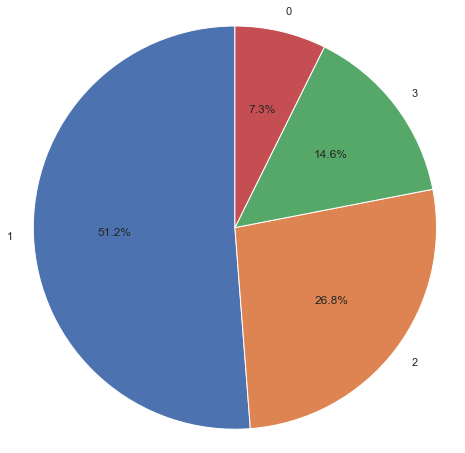

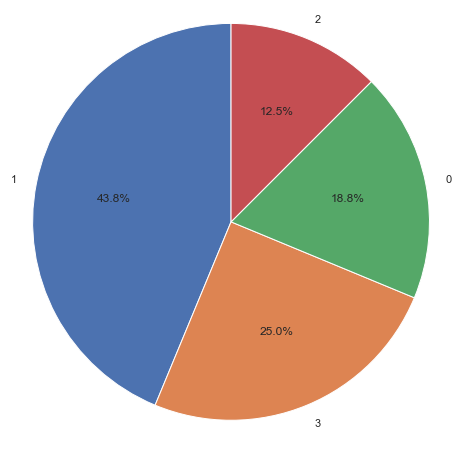

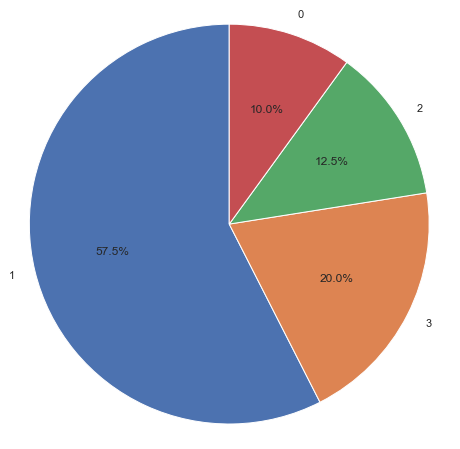

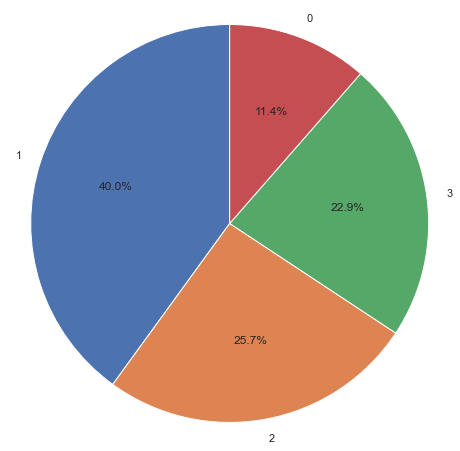

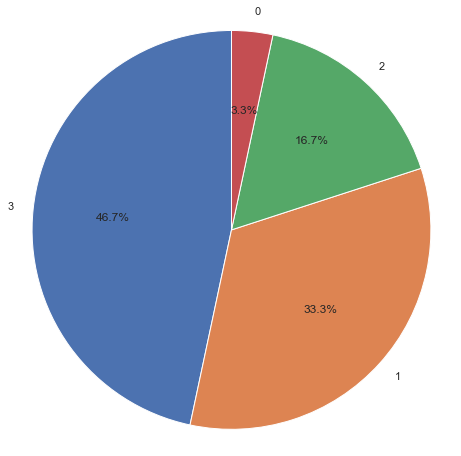

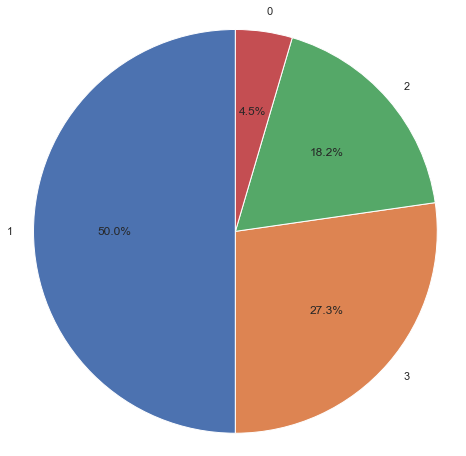

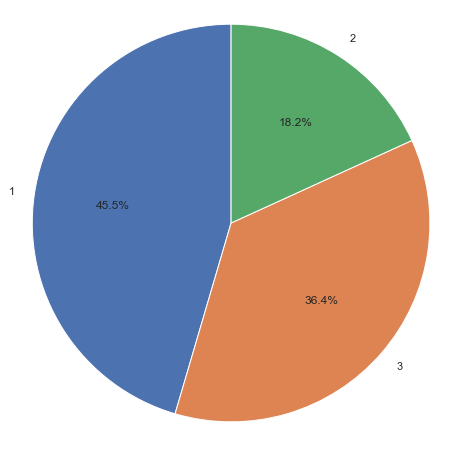

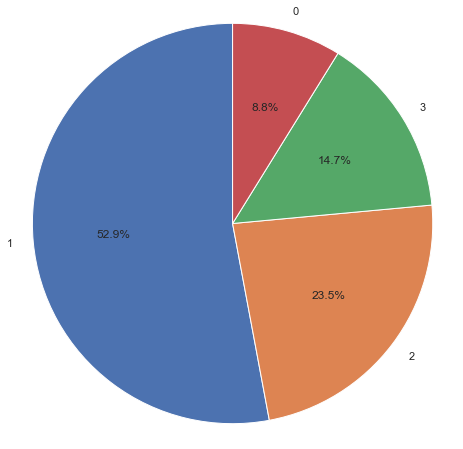

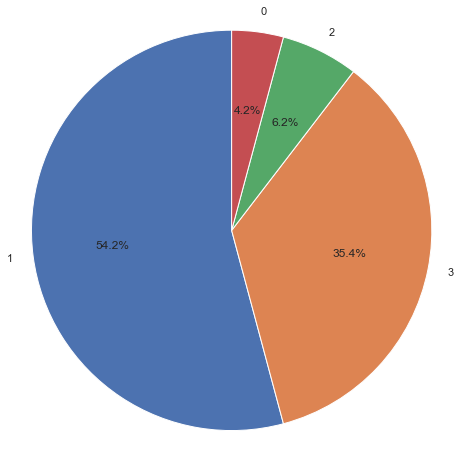

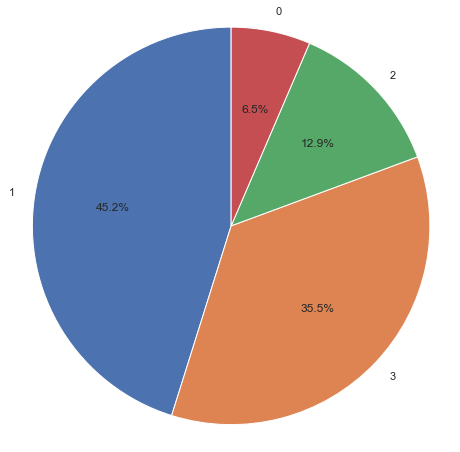

In [46]:
team_lst = [df_Doosan, df_Samsung, df_NC, df_Nexen, df_SK, df_Hanhwa, df_KIA, df_Lotte, df_LG, df_KT]
for team in team_lst:
    # 'Category' 열의 값에 대한 빈도 계산
    category_counts = team['Cluster'].value_counts()
    # 파이 차트 그리기
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    # plt.title(f'{team} 군집 별 선수 분포')
    plt.axis('equal')  # 동그란 형태로 보이도록 설정
    plt.show()

In [67]:
# WAR 데이터 불러오기
kiakt = pd.read_excel('/Users/seheemoon/Desktop/팀별 WAR/kia kt.xlsx')
kiakt = kiakt[kiakt['팀명'].isin(['KIA', 'KT'])]
kiakt = kiakt[['이름', '연도', 'WAR']]
lottelg = pd.read_excel('/Users/seheemoon/Desktop/팀별 WAR/롯데LG_WAR.xlsx')
lottelg = lottelg[lottelg['팀명'].isin(['롯데', 'LG'])]
lottelg = lottelg[['이름', '연도', 'WAR']]
ncnx = pd.read_excel('/Users/seheemoon/Desktop/팀별 WAR/NC키움.xlsx')
ncnx = ncnx[ncnx['팀명'].isin(['NC', '넥센'])]
ncnx = ncnx[['이름', '연도', 'WAR']]
dsss = pd.read_excel('/Users/seheemoon/Desktop/팀별 WAR/최종_두산&삼성.xlsx')
dsss = dsss[dsss['팀명'].isin(['두산', '삼성'])]
dsss = dsss[['이름', '연도', 'WAR']]
skhh = pd.read_excel('/Users/seheemoon/Desktop/팀별 WAR/sk 한화.xlsx')
skhh = skhh[skhh['팀명'].isin(['SK', '한화'])]
skhh = skhh[['이름', '연도', 'WAR']]
df_WAR = pd.concat([kiakt, lottelg, ncnx, dsss, skhh], axis=0)
merged_df = pd.merge(df, df_WAR, on=['이름', '연도'])
WAR_df = merged_df[['이름', '연도', '팀명', 'WAR']]
WAR_df

,이름,연도,팀명,WAR
0,강경학,2015,한화,0.110
1,강경학,2016,한화,-0.690
2,강구성,2015,NC,-0.020
3,강구성,2016,NC,-0.080
4,강민국,2015,NC,-0.050
...,...,...,...,...
363,황윤호,2016,NC,-0.170
364,황재균,2015,롯데,4.692
365,황재균,2016,롯데,6.073
366,황진수,2015,롯데,-0.040


In [76]:
# Cluster 값에 따른 새로운 값 매핑
values = {
    0: 36119.1598,
    1: 2707.0872,
    2: 53596.1508,
    3: 18219.8153
}

df_cluster['기대 연봉'] = df_cluster['Cluster'].map(values)
df_cluster['WAR'] = WAR_df['WAR']
df_cluster['기대 연봉 대비 WAR'] = WAR_df['WAR'] / df_cluster['기대 연봉'] * 10000
df_cluster

,이름,연차,연도,팀명,몸값(만원),타율,경기수,타수,득점,2루타,...,기사수(제목),결혼 여부,연고지 일치 여부,키,몸무게,팀순위가중치,Cluster,기대 연봉,기대 연봉 대비 WAR,WAR
0,강경학,3,2015,한화,6500,0.257,120,311,50,7,...,20,0,0,180,72,4,3,18219.8153,0.060374,0.110
1,강경학,4,2016,한화,6200,0.158,46,101,16,3,...,20,0,0,180,72,4,1,2707.0872,-2.548865,-0.690
2,강구성,2,2015,NC,2700,0.200,4,5,0,1,...,0,0,0,180,82,7,1,2707.0872,-0.073880,-0.020
3,강구성,3,2016,NC,2700,0.000,2,3,0,0,...,0,0,0,180,82,7,1,2707.0872,-0.295521,-0.080
4,강민국,2,2015,NC,2700,0.000,1,2,0,0,...,0,0,0,176,80,7,1,2707.0872,-0.184700,-0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,황윤호,2,2016,NC,3000,0.083,33,12,7,0,...,1,0,0,177,78,7,1,2707.0872,-0.627981,-0.170
364,황재균,9,2015,롯데,50000,0.290,144,534,95,41,...,163,0,0,183,96,2,2,53596.1508,0.875436,4.692
365,황재균,10,2016,롯데,120000,0.335,127,498,97,26,...,163,0,0,183,96,2,0,36119.1598,1.681379,6.073
366,황진수,4,2015,롯데,2800,0.000,2,2,0,0,...,0,0,0,181,82,2,1,2707.0872,-0.147760,-0.040


In [ ]:
# '팀명' 별로 '기대 연봉 대비 WAR' 합계 계산 후 내림차순으로 정렬
team_sum = df_cluster.groupby('팀명')['기대 연봉 대비 WAR'].sum().sort_values(ascending=False)

team_sum = pd.DataFrame(team_sum)
team_sum

,기대 연봉 대비 WAR
팀명,
두산,24.908003
SK,19.510629
NC,16.490700
넥센,13.913953
LG,8.237401
삼성,5.496685
롯데,0.354273
KIA,-2.769735
한화,-3.705366
